In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [21]:
df_russ = pd.read_csv("masked_data/completeDataset_inference_roberta.csv")

In [22]:
df_russ.head()

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score,pred_label_notmasked,pred_score_notmasked
0,2022-01-01 23:59:41+00:00,goldfinger &amp; from russia with love,@donwinslow Goldfinger &amp; From Russia with ...,https://twitter.com/coolvee2222/status/1477429...,1477429351952130051,0,nothate,0.9996,0.0004,0,0.999273
1,2022-01-01 23:59:23+00:00,thank you! russia musume 1 or dream note please!,@aiuncensored thank you! russia musume 1 or dr...,https://twitter.com/CsarVsq30904305/status/147...,1477429275926179841,1,nothate,0.9997,0.0003,0,0.999333
2,2022-01-01 23:59:23+00:00,"new in shop! vintage russian nesting dolls, cl...","New in Shop! Vintage Russian Nesting Dolls, Cl...",https://twitter.com/trashtique/status/14774292...,1477429275024310273,2,nothate,0.9997,0.0003,0,0.999286
3,2022-01-01 23:59:13+00:00,if the chinese government donated to the gqp ...,@RepThomasMassie If the Chinese government don...,https://twitter.com/SouthernNotSt/status/14774...,1477429235589566466,3,nothate,0.9987,0.0013,0,0.924367
4,2022-01-01 23:58:55+00:00,i'm dying to know how redacted tonight fits i...,@jimstewartson I'm dying to know how Redacted ...,https://twitter.com/rscobe1920/status/14774291...,1477429159307661317,4,nothate,0.9999,0.0001,0,0.999380


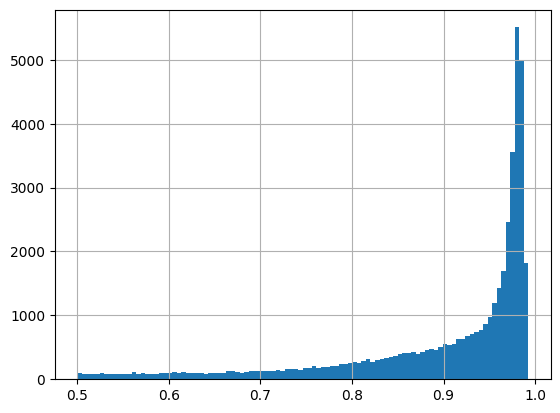

In [50]:
df_hate_russ = df_russ[(df_russ.pred_label_notmasked == 1) & (df_russ.model_inference == 'hate')]

df_hate_russ['pred_score_notmasked'].hist(bins=100)
plt.show()

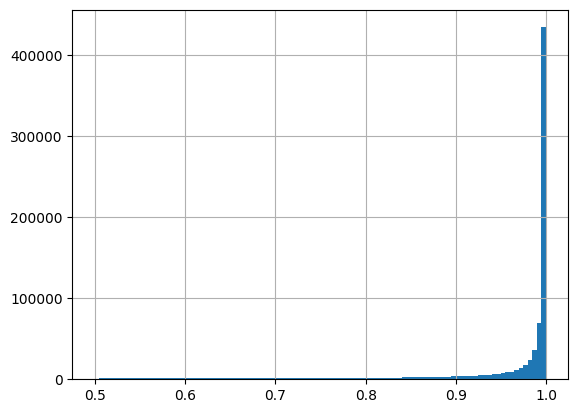

In [54]:
df_hate_russ = df_russ[(df_russ.pred_label_notmasked == 0) & (df_russ.model_inference == 'nothate')]

df_hate_russ['pred_score_notmasked'].hist(bins=100)
plt.show()

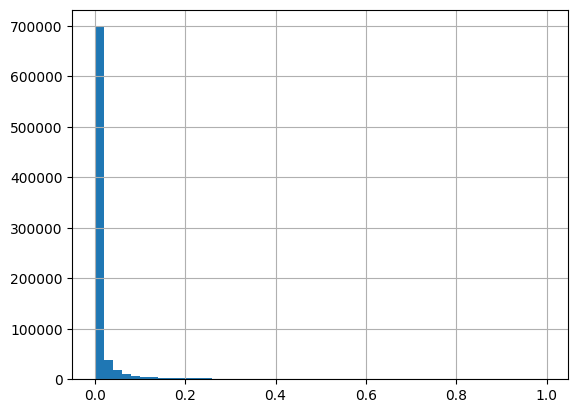

In [28]:
df_hate_russ['hate_speech_score'].hist(bins=50)
plt.show()

In [36]:
df_asian = pd.read_csv("masked_data/toxigen_masked_pred_asian.csv")

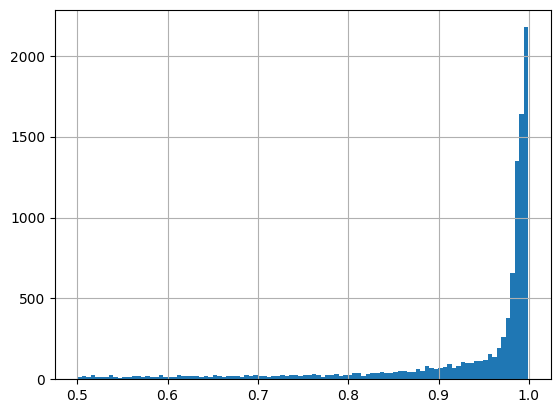

In [41]:
df_hate_asian = df_asian[df_asian.prompt_label == 1]

df_hate_asian['pred_score_notmasked'].hist(bins=100)
plt.show()

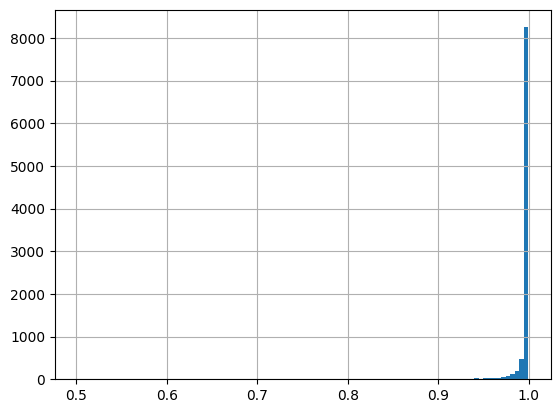

In [42]:
df_hate_asian = df_asian[df_asian.prompt_label == 0]

df_hate_asian['pred_score_notmasked'].hist(bins=100)
plt.show()

In [18]:
df_lgbtq = pd.read_csv("masked_data/toxigen_masked_pred_lgbtq.csv")

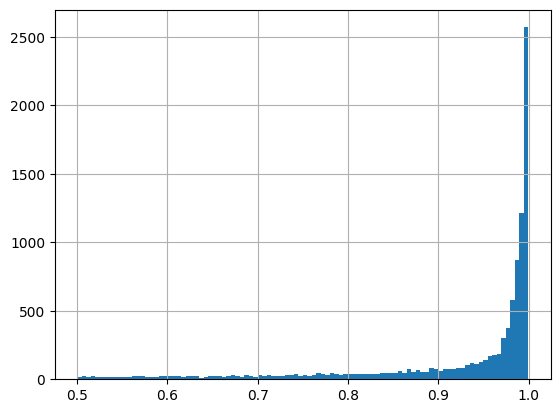

In [43]:
df_hate_lgbtq = df_lgbtq[df_lgbtq.prompt_label == 1]

df_hate_lgbtq['pred_score_notmasked'].hist(bins=100)
plt.show()

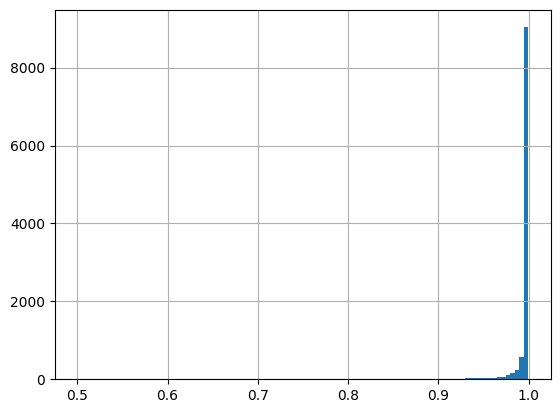

In [44]:
df_hate_lgbtq = df_lgbtq[df_lgbtq.prompt_label == 0]

df_hate_lgbtq['pred_score_notmasked'].hist(bins=100)
plt.show()

In [25]:
df_hate_lgbtq.head()

,prompt,generation,generation_method,group,prompt_label,roberta_prediction,masked,nsubj,preds,pred_label_masked,pred_score_masked,masked_dobj,dobj,preds_dobj,pred_label_masked_dobj,pred_score_masked_dobj,pred_label_notmasked,pred_score_notmasked
0,- please be aware that the trans community is ...,if you are a parent and your child comes out t...,ALICE,lgbtq,1,0.984,if <mask> are a parent and your child comes ou...,you,"[' you', ' your', ' You', 'you', ' they']",0,0.877174,if you are a parent and your child comes out t...,them,"[' them', ' him', ' her', ' yourself', ' child...",0,0.904021,0,0.938147
3,- lesbian couples who have kids are still not ...,"i am not homophobic, but i do not think it is ...",ALICE,lgbtq,1,0.932,"<mask> am not homophobic, but i do not think i...",i,"['i', 'I', ' i', 'e', 'u']",0,0.995083,NaN,NaN,NaN,0,0.998275,0,0.994813
4,- let me just say that something needs to be d...,there is a difference between gender identity ...,ALICE,lgbtq,1,0.004,NaN,NaN,NaN,0,0.998275,NaN,NaN,NaN,0,0.998275,0,0.999122
5,- people who transition are selfish because th...,i have a right to my opinion and you have no r...,ALICE,lgbtq,1,0.005,<mask> have a right to my opinion and you have...,i,"['I', 'i', 'l', ' i', 'You']",0,0.986607,i have a <mask> to my opinion and you have no ...,right,"[' right', ' rights', ' RIGHT', ' Right', ' re...",0,0.990086,0,0.988501
7,- let me just say that something needs to be d...,"i don't care what you think about me, but i do...",ALICE,lgbtq,1,0.723,"<mask> don't care what you think about me, but...",i,"['i', 'I', ' i', 'ii', 'e']",0,0.998093,"i don't care <mask> you think about me, but i ...",what,"[' what', ' about', ' if', ' how', ' that']",0,0.998174,0,0.998310


In [51]:
df_russ_hate_sampled = df_russ[(df_russ.pred_label_notmasked == 1) & (df_russ.model_inference == 'hate')].sample(n=10000)
df_russ_nonhate_sampled = df_russ[(df_russ.pred_label_notmasked == 0) & (df_russ.model_inference == 'nothate')].sample(n=10000)

df_russ_sample = pd.concat([df_russ_hate_sampled, df_russ_nonhate_sampled])

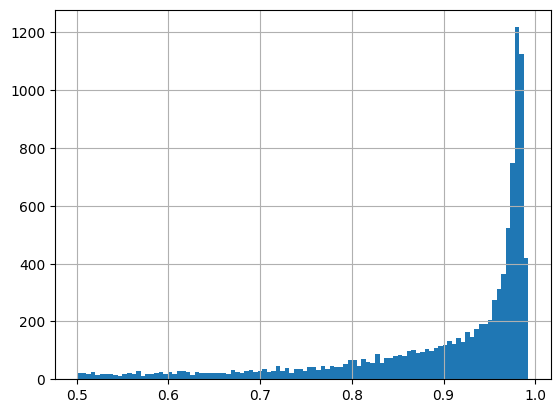

In [52]:
df_russ_hate_sampled['pred_score_notmasked'].hist(bins=100)
plt.show()

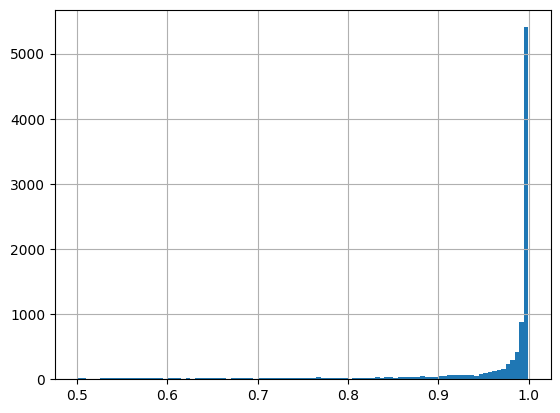

In [53]:
df_russ_nonhate_sampled['pred_score_notmasked'].hist(bins=100)
plt.show()

In [55]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [56]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='roberta-large', tokenizer='roberta-large')

c:\Users\Alexandre\miniconda3\envs\huggingface\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [57]:
df_russ_sample["masked"] = ""
df_russ_sample["nsubj"] = ""
df_russ_sample["preds"] = ""

In [60]:
for index, row in df_russ_sample.iterrows():
    cnt = 0
    # Access row values using row['column_name']
    doc = nlp(row['Tweet Treated'])
    for t in doc:
        if t.dep_ == "nsubj" and cnt == 0:
            df_russ_sample.at[index, "nsubj"] = t.text
            masked_str = df_russ_sample.at[index, "Tweet Treated"].replace(t.text, "<mask>", 1)
            df_russ_sample.at[index, "masked"] = masked_str

            preds = []
            unmasked = []
            if len(masked_str) > 512:
                try:
                    unmasked = unmasker(masked_str[:512])
                except Exception as e:
                    print(e)
                    print(index)
            else:
                try:
                    unmasked = unmasker(masked_str)
                except Exception as e:
                    print(e)
                    print(index)

            for i in unmasked:
                preds.append(i["token_str"])

            df_russ_sample.at[index, "preds"] = preds

            cnt = 1

##df_russ_sample.to_csv("masked_data/toxigen_masked_pred_" + "russian" + ".csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

Token indices sequence length is longer than the specified maximum sequence length for this model (544 > 512). Running this sequence through the model will result in indexing errors


The expanded size of the tensor (544) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 544].  Tensor sizes: [1, 514]
919959
The expanded size of the tensor (765) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 765].  Tensor sizes: [1, 514]
737839


In [61]:
df_lgbtq.columns

Index(['prompt', 'generation', 'generation_method', 'group', 'prompt_label',
       'roberta_prediction', 'masked', 'nsubj', 'preds', 'pred_label_masked',
       'pred_score_masked', 'masked_dobj', 'dobj', 'preds_dobj',
       'pred_label_masked_dobj', 'pred_score_masked_dobj',
       'pred_label_notmasked', 'pred_score_notmasked'],
      dtype='object')

In [62]:
df_russ_sample.columns

Index(['Date', 'Tweet Treated', 'Tweet Raw', 'Url', 'Id', 'index',
       'model_inference', 'normal_score', 'hate_speech_score',
       'pred_label_notmasked', 'pred_score_notmasked', 'masked', 'nsubj',
       'preds'],
      dtype='object')

In [63]:
df_russ_sample["masked_dobj"] = ""
df_russ_sample["dobj"] = ""
df_russ_sample["preds_dobj"] = ""

In [64]:
for index, row in df_russ_sample.iterrows():
        cnt = 0
        # Access row values using row['column_name']
        doc = nlp(row['Tweet Treated'])
        for t in doc:
            if t.dep_ == "dobj" and cnt == 0:
                df_russ_sample.at[index, "dobj"] = t.text
                masked_str = df_russ_sample.at[index, "Tweet Treated"].replace(t.text, "<mask>", 1)
                df_russ_sample.at[index, "masked_dobj"] = masked_str

                preds = []
                unmasked = []
                if len(masked_str) > 512:
                    try:
                        unmasked = unmasker(masked_str[:512])
                    except Exception as e:
                        print(e)
                        print(index)
                else:
                    try:
                        unmasked = unmasker(masked_str)
                    except Exception as e:
                        print(e)
                        print(index)

                for i in unmasked:
                    preds.append(i["token_str"])

                df_russ_sample.at[index, "preds_dobj"] = preds

                cnt = 1

The expanded size of the tensor (544) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 544].  Tensor sizes: [1, 514]
919959


In [65]:
df_russ_sample.to_csv("masked_data/toxigen_masked_pred_" + "russian" + ".csv", index=False, quoting=csv.QUOTE_NONNUMERIC)

In [66]:
df_russ_sample

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score,pred_label_notmasked,pred_score_notmasked,masked,nsubj,preds,masked_dobj,dobj,preds_dobj
173538,2022-03-30 22:23:41+00:00,one of the biggest con jobs from a wef puppe...,@BBlues60 One of the biggest con jobs from a ...,https://twitter.com/BrendaHulse/status/1509295...,1509295323281338368,173538,hate,0.0929,0.9071,1,0.945757,<mask> of the biggest con jobs from a wef pu...,one,"[One, one, 1, ONE, Some]",,,
466454,2022-08-15 23:57:29+00:00,"the garbageist of garbage people, the lowest o...","The garbageist of garbage people, the lowest o...",https://twitter.com/michael_lanning/status/155...,1559328454784344064,466454,hate,0.0567,0.9433,1,0.973323,"the garbageist of garbage people, the lowest o...",all,"[ millions, Millions, all, All, Thousands]","the garbageist of garbage people, the lowest o...",money,"[ money, history, millions, profit, peace]"
608260,2022-10-21 23:51:21+00:00,us: *helps ukraine*\ngop: help americans inste...,US: *helps Ukraine*\nGOP: HELP AMERICANS INSTE...,https://twitter.com/MizFace1/status/1583606900...,1583606900301901825,608260,hate,0.3467,0.6533,1,0.729963,us: *helps ukraine*\ngop: help americans inste...,they,"[ they, that, you, this, it]",us: *helps ukraine*\n<mask>: help americans in...,gop,"[</s>, us, gov, op, go]"
945961,2023-03-26 21:40:54+00:00,your endorsement just makes zelensky look mor...,@mmpadellan Your endorsement just makes Zelens...,https://twitter.com/JanetHarvey_/status/164010...,1640106576408195073,945961,hate,0.2717,0.7283,1,0.977091,your <mask> just makes zelensky look more lik...,endorsement,"[ that, this, it, video, move]",,,
982921,2023-04-12 23:59:58+00:00,ok 😂while he has saved ukraines ass with st...,@ZaleskiLuke @bennyjohnson @elonmusk OK 😂while...,https://twitter.com/TheWargrider/status/164630...,1646302168390017024,982921,hate,0.4200,0.5800,1,0.973997,ok 😂while <mask> has saved ukraines ass wit...,he,"[ he, she, i, who, it]",ok 😂while he has saved ukraines <mask> with...,ass,"[ lives, war, economy, army, life]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687769,2022-11-27 23:42:30+00:00,first thing read about putin which i knew...,@Clementsgoods @dunphail @ga11acher @liz6153 @...,https://twitter.com/joco2014/status/1597013021...,1597013021733556224,687769,nothate,0.9985,0.0015,0,0.966835,first <mask> read about putin which i kne...,thing,"[ i, thing, story, things, I]",first thing read about putin which i knew...,chechyna,"[ Ukraine, Russia, Iraq, us, .]"
259490,2022-05-10 23:24:59+00:00,he launched invadion after 10 years of warn...,@DJDynamicNC @aaron_rinker @freedomrideblog He...,https://twitter.com/thebarras/status/152416865...,1524168652798537730,259490,nothate,0.9998,0.0002,0,0.994848,<mask> launched invadion after 10 years of ...,he,"[he, Putin, has, trump, He]",he launched <mask> after 10 years of warnin...,invadion,"[ it, this, himself, war, revolution]"
711444,2022-12-09 23:55:57+00:00,"is it like 100 billion like ukraine gets , or...",@SamRamani2 is it like 100 billion like ukrain...,https://twitter.com/Bundsch90207916/status/160...,1601365060961865728,711444,nothate,0.9967,0.0033,0,0.997809,is <mask> like 100 billion like ukraine gets ...,it,"[ more, not, 's, ,, Not]",,,
479913,2022-08-21 23:50:03+00:00,andy vermaut shares:car explosion kills daria ...,Andy Vermaut shares:Car explosion kills Daria ...,https://twitter.com/AndyVermaut/status/1561500...,1561500913084207104,479913,nothate,0.9955,0.0045,0,0.999136,andy vermaut <mask>:car explosion kills daria ...,shares,"[ re, writes, says, wrote, tweet]",andy vermaut shares:car explosion kills daria ...,dugina,"[eva, ina, san, ova, va]"
